In [1]:
%pip install pycaret --quiet

In [2]:
from pycaret.classification import *
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, classification_report
from sklearn.tree import export_text

# <> Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# <> Biliotecas para manipulação com dados
import pandas as pd

In [3]:
#Lendo os dados
dados = pd.read_csv("/content/predictive_maintenance.csv", sep=",")

In [4]:
#Mostrando as primeiras linhas
dados.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
#Retirando as colunas com os IDs e a segunda target
dados = dados.drop(columns = ["UDI", "Product ID", "Failure Type"])

In [37]:
# Exibindo as primeiras linhas do dataset para entender sua estrutura
print(dados.head())

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target  
0         42.8                0       0  
1         46.3                3       0  
2         49.4                5       0  
3         39.5                7       0  
4         40.0                9       0  


In [38]:
# Exibindo informações gerais sobre o dataset
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB
None


In [40]:
# Realizando a análise das estatísticas descritivas das colunas numéricas : média, mediana, desvio padrão, mínimo e máximo.
print(dados.select_dtypes(include=['number']).describe())

       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.033900  
std        9.968934        63.654147      0.180981  
min        3.800000         0.000000      0.000000  
25%       33.200000    

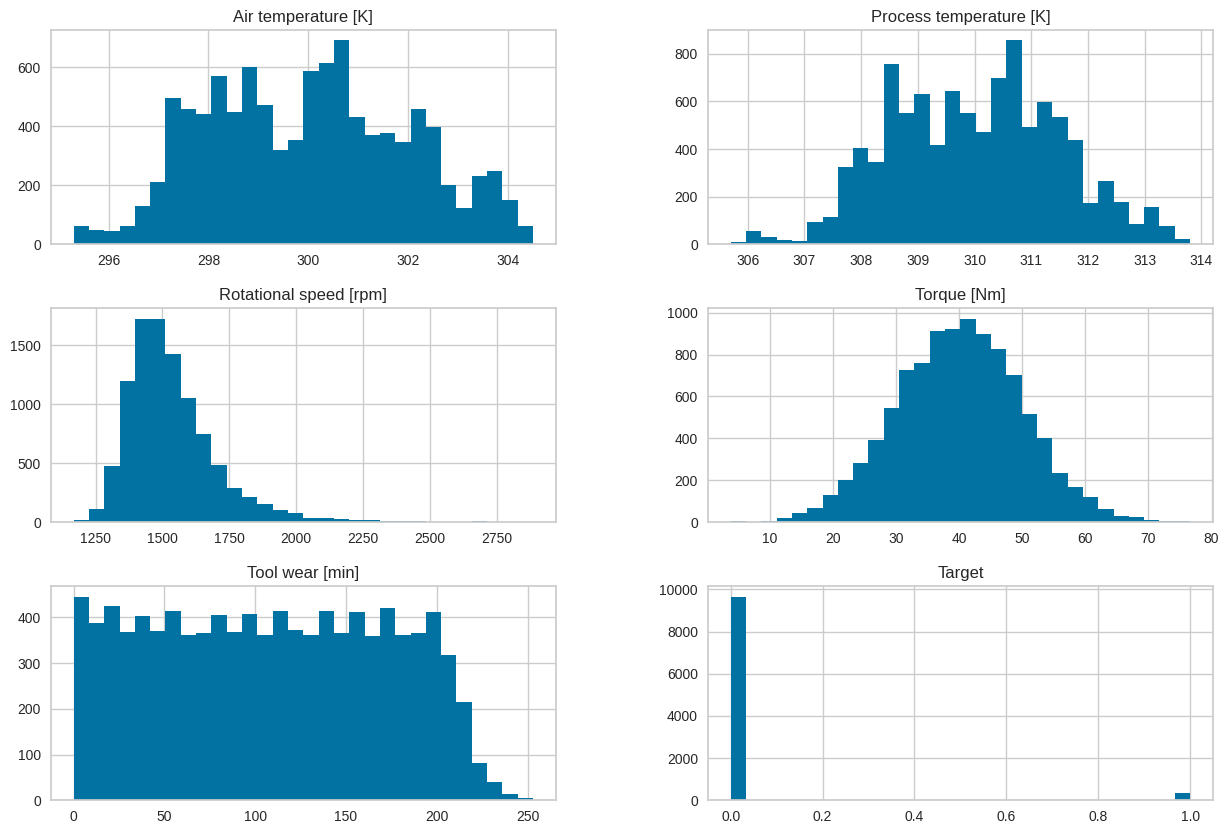

In [41]:
# Analisando a distribuição das variáveis numéricas : a dispersão e forma dos dados.
dados.hist(bins=30, figsize=(15, 10))
plt.show()


Matriz de correlação:


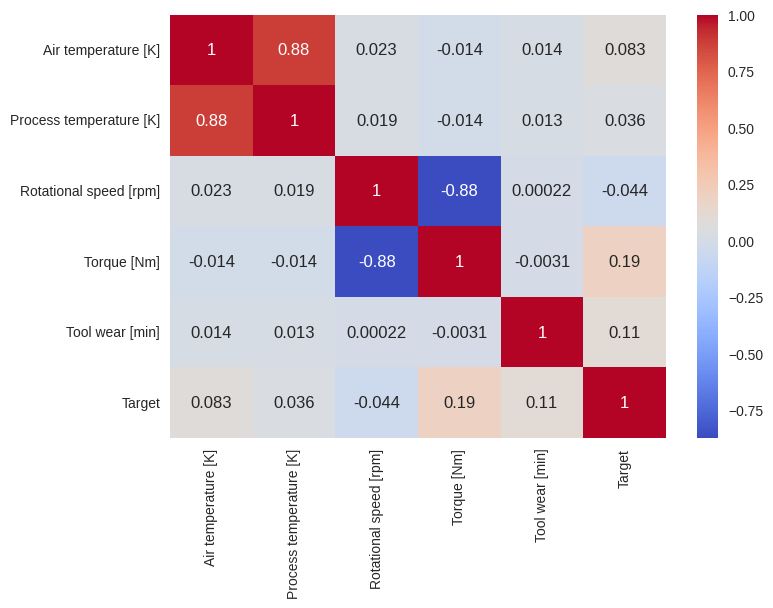

In [42]:
# Analisando a correlação entre as variáveis numéricas: entender possíveis padrões e dependências entre as variáveis.
print("\nMatriz de correlação:")
corr_matrix = dados.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Distribuição de Type:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


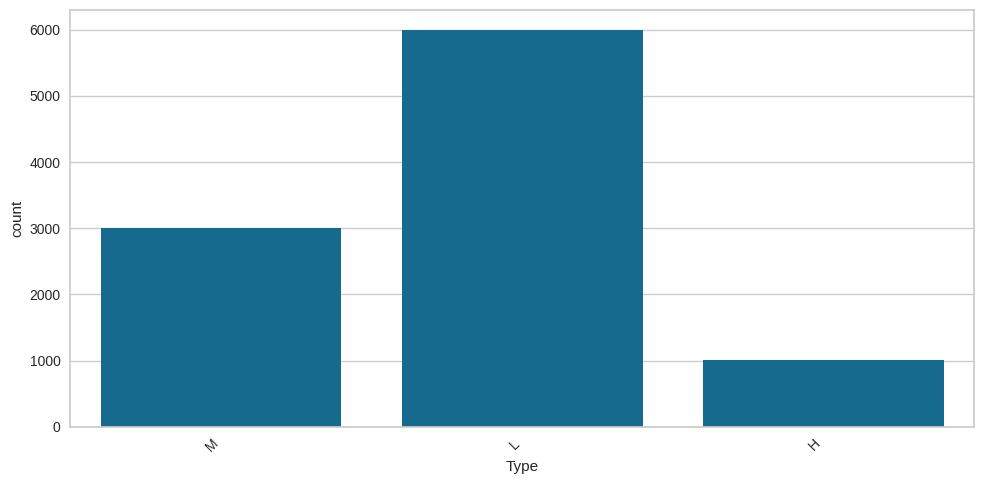

In [44]:
# Analisando a distribuição das variáveis categóricas: frequência e proporção das categorias
categorical_columns = ['Type']
for col in categorical_columns:
    print(f"\nDistribuição de {col}:")
    print(dados[col].value_counts())
    plt.figure(figsize=(10, 5))  # Ajusta o tamanho da figura
    ax = sns.countplot(x=col, data=dados)
    plt.xticks(rotation=45, ha="right")  # Gira os rótulos para melhor visualização
    plt.tight_layout()  # Ajusta os espaçamentos para evitar cortes
    plt.show()

In [7]:
#Separando dados de treino e teste
dados_teste = dados[8000:]
dados_treino = dados[:8000]

# Ultilizando árvore aleatória com K-Fold


In [8]:
cdt = setup(data = dados_treino,
            target = 'Target',
            test_data = dados_teste,
            session_id = 123,
            index = False)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(10000, 9)"
5,Transformed train set shape,"(8000, 9)"
6,Transformed test set shape,"(2000, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [9]:
#decision_tree_model = create_model('dt', max_depth = 10, min_samples_split = 2, cross_validation = False)
decision_tree_model = create_model('dt', max_depth = 10, fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9838,0.8692,0.6667,0.8696,0.7547,0.7465,0.7535
1,0.8162,0.6596,0.5000,0.1020,0.1695,0.1143,0.1612
2,0.9762,0.6410,0.4333,0.8667,0.5778,0.5670,0.6033
3,0.9788,0.8105,0.5667,0.8095,0.6667,0.6560,0.6672
4,0.9662,0.8881,0.6000,0.5455,0.5714,0.5539,0.5546
5,0.9525,0.9927,1.0000,0.4412,0.6122,0.5910,0.6476
6,0.9075,0.9182,0.9333,0.2800,0.4308,0.3959,0.4824
7,0.9675,0.4924,0.4667,0.5833,0.5185,0.5019,0.5053
8,0.9712,0.8150,0.5000,0.6522,0.5660,0.5514,0.5566


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

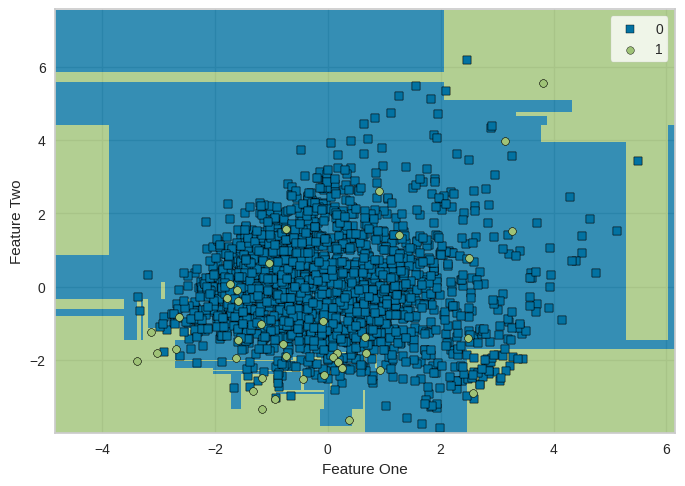

In [10]:
plot_model(decision_tree_model, plot = 'boundary')

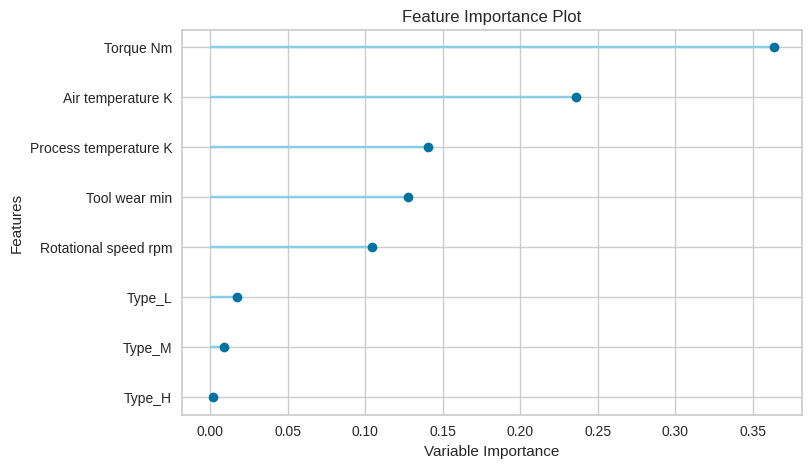

In [11]:
plot_model(decision_tree_model, plot = 'feature')

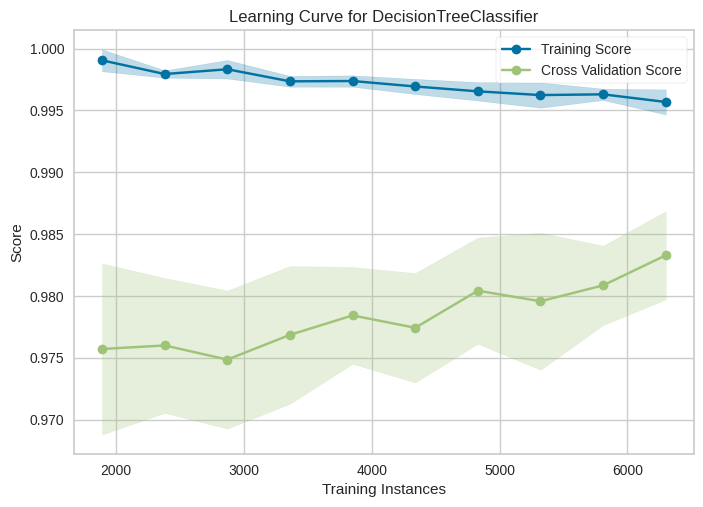

In [45]:
#Visualizando a curva de aprendizado
plot_model(decision_tree_model, plot = 'learning')

In [12]:
estrutura_DT = export_text(decision_tree_model, feature_names=['Type_H','Type_L','Type_M',	'Air temperature [K]',	'Process temperature [K]',	'Rotational speed [rpm]',	'Torque [Nm]',	'Tool wear [min]'])
print(estrutura_DT)

|--- Torque [Nm] <= 65.00
|   |--- Torque [Nm] <= 13.15
|   |   |--- Process temperature [K] <= 313.30
|   |   |   |--- Tool wear [min] <= 12.50
|   |   |   |   |--- Tool wear [min] <= 7.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Tool wear [min] >  7.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Tool wear [min] >  12.50
|   |   |   |   |--- class: 1
|   |   |--- Process temperature [K] >  313.30
|   |   |   |--- class: 0
|   |--- Torque [Nm] >  13.15
|   |   |--- Rotational speed [rpm] <= 1380.50
|   |   |   |--- Air temperature [K] <= 301.55
|   |   |   |   |--- Tool wear [min] <= 188.50
|   |   |   |   |   |--- Torque [Nm] <= 62.35
|   |   |   |   |   |   |--- Tool wear [min] <= 185.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Tool wear [min] >  185.50
|   |   |   |   |   |   |   |--- Torque [Nm] <= 60.55
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Torque [Nm] >  60.55
|   |   |   |   |   |   |   |

In [13]:
dt_testing_pred = predict_model(decision_tree_model, data = dados_teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9850,0.7785,0.4872,0.6552,0.5588,0.5514,0.5576


In [14]:
dt_testing_pred.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,prediction_label,prediction_score
0,M,300.799988,312.000000,1443,53.299999,151,0,0,0.9989
1,L,300.799988,312.000000,1374,50.200001,154,0,0,1.0000
2,M,300.899994,312.100006,1851,23.000000,156,0,0,0.9989
3,M,300.799988,312.000000,1274,67.300003,159,0,1,1.0000
4,L,300.899994,312.000000,1533,44.000000,162,0,0,0.9989


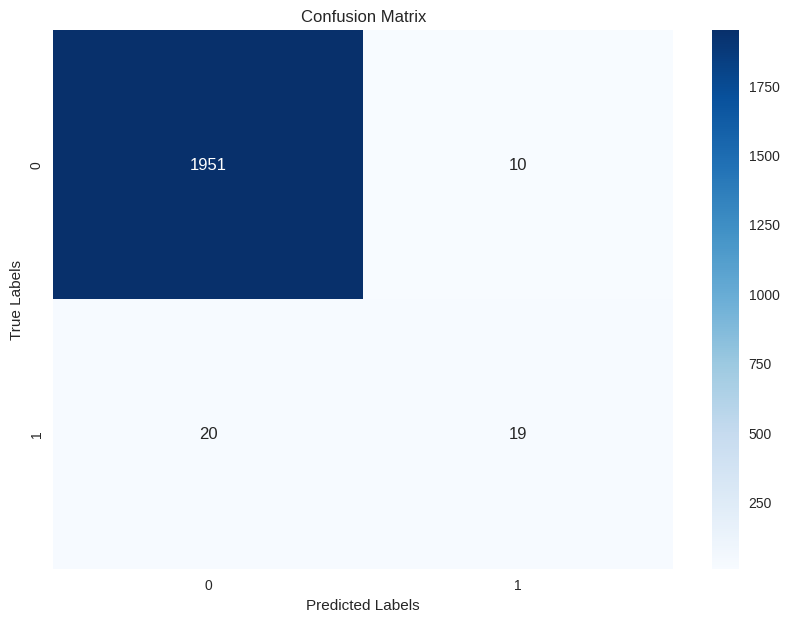

Accuracy: 0.985
Kappa: 0.5513616174909151
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1961
           1       0.66      0.49      0.56        39

    accuracy                           0.98      2000
   macro avg       0.82      0.74      0.78      2000
weighted avg       0.98      0.98      0.98      2000



In [15]:
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = dt_testing_pred['Target']
predicted_labels = dt_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

# Utilizando Floresta aleatória com K-Fold


In [19]:
#Preparando o setup
clf = setup(data = dados, target = 'Target', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,Target
2,Target type,Binary
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(10000, 9)"
5,Transformed train set shape,"(7000, 9)"
6,Transformed test set shape,"(3000, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [20]:
#Criando o modelo de floresta aleatória
rf_fold_tree_model = create_model('rf', n_estimators = 100, max_depth = 8, min_samples_split = 2, fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9814,0.9898,0.4783,0.9167,0.6286,0.6200,0.6548
1,0.9771,0.9827,0.3043,1.0000,0.4667,0.4584,0.5453
2,0.9771,0.9315,0.3913,0.8182,0.5294,0.5192,0.5566
3,0.9743,0.9806,0.3750,0.7500,0.5000,0.4883,0.5195
4,0.9814,0.9879,0.4583,1.0000,0.6286,0.6204,0.6706
5,0.9786,0.9766,0.4167,0.9091,0.5714,0.5620,0.6075
6,0.9786,0.9717,0.3750,1.0000,0.5455,0.5368,0.6057
7,0.9771,0.9448,0.3750,0.9000,0.5294,0.5197,0.5728
8,0.9743,0.9798,0.2917,0.8750,0.4375,0.4277,0.4968


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
print(rf_fold_tree_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=12345, verbose=0,
                       warm_start=False)


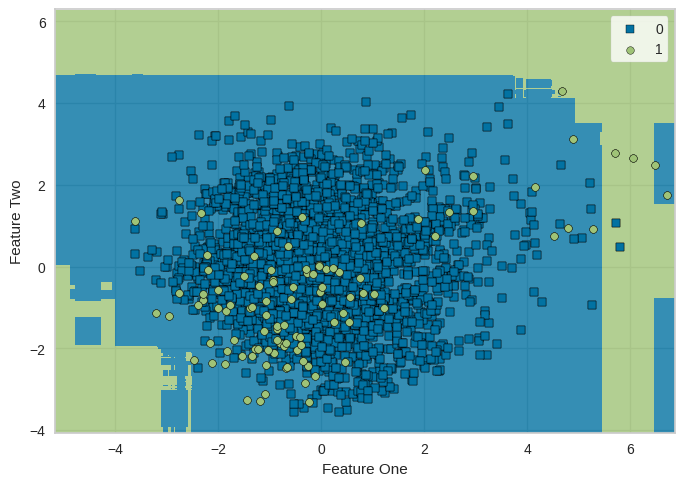

In [22]:
#Visualizando o modelo em forma de gráfico
plot_model(rf_fold_tree_model, plot = 'boundary')

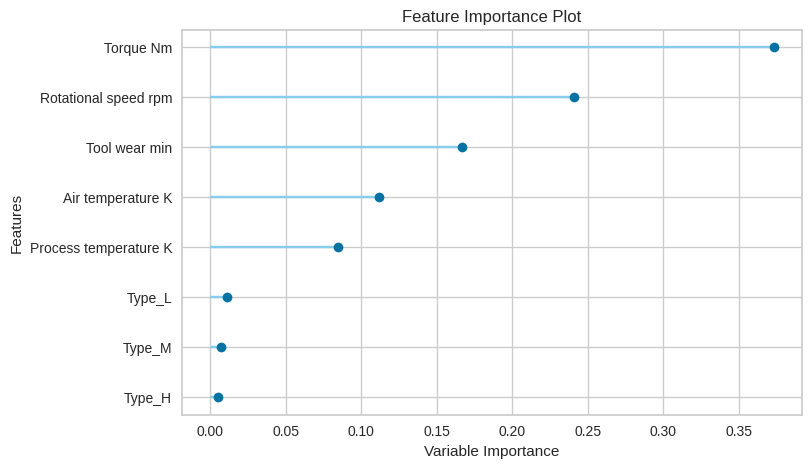

In [23]:
#Visualizando a importância das variáveis no modelo
plot_model(rf_fold_tree_model, plot = 'feature')

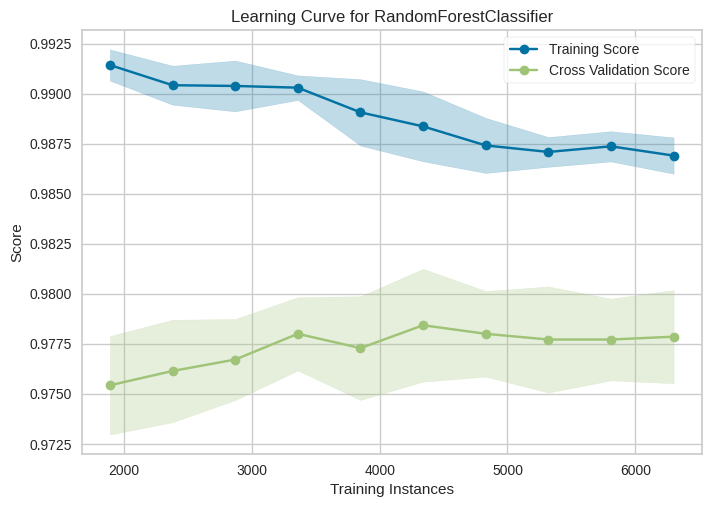

In [24]:
#Visualizando a curva de aprendizado
plot_model(rf_fold_tree_model, plot = 'learning')

In [25]:
# Visualizando as métricas do modelo com os dados de teste
dt_testing_pred = predict_model(rf_fold_tree_model, data = dados_teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9915,0.9884,0.5641,1.0000,0.7213,0.7173,0.7478


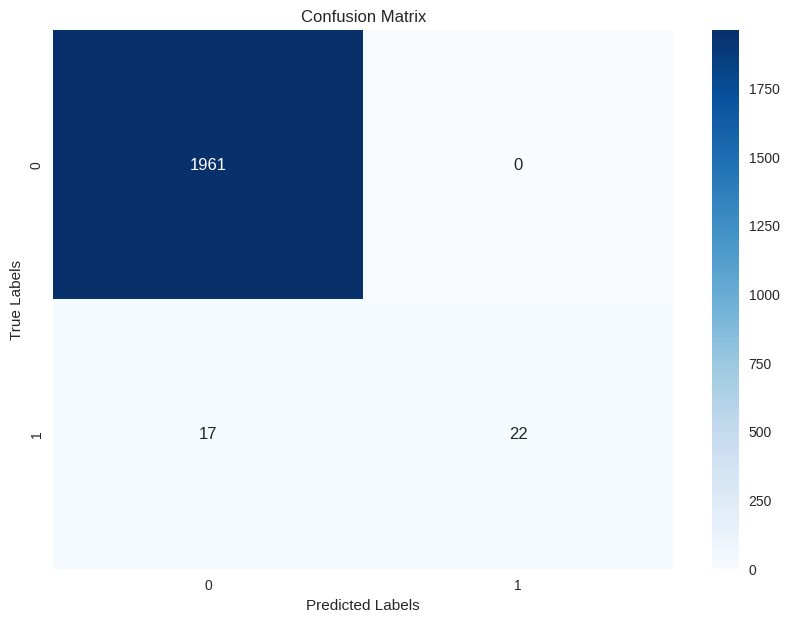

Accuracy: 0.9915
Kappa: 0.717335638987729
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1961
           1       1.00      0.56      0.72        39

    accuracy                           0.99      2000
   macro avg       1.00      0.78      0.86      2000
weighted avg       0.99      0.99      0.99      2000



In [26]:
# Matriz de confusão com os resultados da predição do modelo
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = dt_testing_pred['Target']
predicted_labels = dt_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)